113034557

楊興元

HW4

## A. Checking and Preprocessing

In [89]:
import pandas as pd

df = pd.read_csv('/Users/adam0725/1332/1233/Pratice/nvda.us.txt')
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,1999-01-22,1.6238,1.8092,1.4379,1.5215,18297633,0
1,1999-01-25,1.6423,1.6980,1.5215,1.6793,3445279,0
2,1999-01-26,1.6980,1.7350,1.5311,1.5494,2320993,0
3,1999-01-27,1.5586,1.5957,1.4660,1.5494,1662658,0
4,1999-01-28,1.5494,1.5586,1.5311,1.5401,1540110,0
...,...,...,...,...,...,...,...
4728,2017-11-06,207.2000,209.9800,206.7000,209.6300,9731783,0
4729,2017-11-07,210.5500,212.9000,210.0560,212.0000,10671815,0
4730,2017-11-08,211.8500,212.0000,207.2400,209.1600,13033902,0
4731,2017-11-09,205.2700,206.3300,200.3700,205.3200,23895006,0


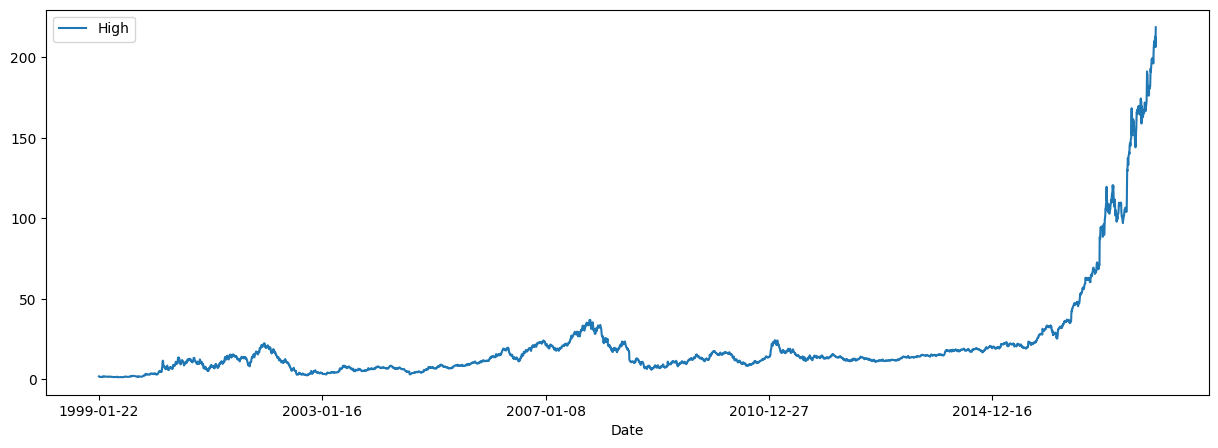

In [90]:
plot = df.plot('Date', 'High', figsize=(15, 5))

In [91]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4733 entries, 0 to 4732
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4733 non-null   object 
 1   Open     4733 non-null   float64
 2   High     4733 non-null   float64
 3   Low      4733 non-null   float64
 4   Close    4733 non-null   float64
 5   Volume   4733 non-null   int64  
 6   OpenInt  4733 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 259.0+ KB


In [93]:
# checking for null values
df.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [94]:
df = df.dropna()

In [95]:
df.shape

(4733, 7)

In [96]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,4733.000000,4733.000000,4733.000000,4733.000000,4.733000e+03,4733.0
mean,20.796242,21.157332,20.420417,20.805404,1.615287e+07,0.0
std,30.236284,30.615622,29.792958,30.263705,1.272446e+07,0.0
min,1.298900,1.317500,1.233900,1.261900,0.000000e+00,0.0
25%,7.988300,8.247900,7.756400,7.978900,8.181100e+06,0.0
50%,12.963000,13.238000,12.721000,12.990000,1.390271e+07,0.0
75%,19.141000,19.418000,18.778000,19.106000,2.051602e+07,0.0
max,213.080000,218.670000,211.630000,216.140000,2.496659e+08,0.0


#### Converting the DataFrame to a NumPy Array

In [97]:
def create_sequences(input_data, output_data, window_size, step):
    sequences = []
    labels = []
    for i in range(0, len(input_data) - window_size, step):
        sequences.append(input_data[i:(i + window_size)])
        labels.append(output_data[i + window_size])
    return np.array(sequences), np.array(labels)

In [98]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Select features
features = df[['Open', 'High', 'Low', 'Close']]
labels = df['High'].shift(-1)  # Next day's high price as label

X, y = create_sequences(features, labels, window_size=20, step=5)

print(f'Shape of data X: {X.shape}')
print(f'Shape of data y: {y.shape}')

# split the hold-out tests
ind = np.linspace(0, len(X)-1, num=int(len(X)*0.1), dtype=int) # 10% hold-out
x_test = X[ind]
y_test = y[ind]
all_ind = np.arange(len(X))
remains_ind = np.delete(all_ind, ind)

X = X[remains_ind]
y = y[remains_ind]

# shuffle dataset
ind = np.random.permutation(len(X))
X = X[ind]
y = y[ind]
split_point = int(X.shape[0]*0.8)

x_train = X[:split_point]
y_train = y[:split_point]
x_val = X[split_point:]
y_val = y[split_point:]

print(f'Shape of data x_train: {x_train.shape}')
print(f'Shape of data y_train: {y_train.shape}')
print(f'Shape of data x_val: {x_val.shape}')
print(f'Shape of data y_val: {y_val.shape}')
print(f'Shape of data x_test: {x_test.shape}')
print(f'Shape of data y_test: {y_test.shape}')

# Convert to PyTorch tensors
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).float()

x_val = torch.from_numpy(x_val).float()
y_val = torch.from_numpy(y_val).float()

x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()

batch_size = 32

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in training and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Shape of data X: (943, 20, 5)
Shape of data y: (943,)
Shape of data x_train: (679, 20, 5)
Shape of data y_train: (679,)
Shape of data x_val: (170, 20, 5)
Shape of data y_val: (170,)
Shape of data x_test: (94, 20, 5)
Shape of data y_test: (94,)
Number of samples in training and validation are 679 and 170.


## B. Defining Neural Networks

In [99]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

## C. Training the Neural Network

In [101]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []

epochs = 100

model = LSTMModel(input_dim=4, hidden_dim=500, num_layers=2, output_dim=1)
print(model)

best_val_loss = float('inf')

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0

    for features, labels in train_loader:

        outputs = model(features).squeeze(-1)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Learning rate update
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)

    # Validation
    model.eval()
    total_val_loss = 0.0

    with torch.no_grad():
        for features, labels in val_loader:
    
            outputs = model(features).squeeze(-1)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_model.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Val loss: {avg_val_loss:.4f}, Best Val loss: {best_val_loss:.4f}')

    # Store performance
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)

LSTMModel(
  (lstm): LSTM(5, 500, num_layers=2, batch_first=True)
  (fc): Linear(in_features=500, out_features=1, bias=True)
)


  1%|          | 1/100 [00:01<03:05,  1.87s/it]

Epoch 1/100, Train loss: 972.5399, Val loss: 953.8992, Best Val loss: 953.8992


  2%|▏         | 2/100 [00:03<03:05,  1.89s/it]

Epoch 2/100, Train loss: 864.2606, Val loss: 950.4419, Best Val loss: 950.4419


  3%|▎         | 3/100 [00:05<03:01,  1.87s/it]

Epoch 3/100, Train loss: 941.9519, Val loss: 949.1305, Best Val loss: 949.1305


  4%|▍         | 4/100 [00:07<02:54,  1.82s/it]

Epoch 4/100, Train loss: 869.6775, Val loss: 948.7628, Best Val loss: 948.7628


  5%|▌         | 5/100 [00:08<02:43,  1.72s/it]

Epoch 5/100, Train loss: 861.8975, Val loss: 948.6783, Best Val loss: 948.6783


  6%|▌         | 6/100 [00:10<02:37,  1.67s/it]

Epoch 6/100, Train loss: 952.5641, Val loss: 948.6438, Best Val loss: 948.6438


  7%|▋         | 7/100 [00:12<02:31,  1.63s/it]

Epoch 7/100, Train loss: 869.2033, Val loss: 950.2507, Best Val loss: 948.6438


  8%|▊         | 8/100 [00:13<02:27,  1.60s/it]

Epoch 8/100, Train loss: 859.6282, Val loss: 948.7248, Best Val loss: 948.6438


  9%|▉         | 9/100 [00:15<02:27,  1.62s/it]

Epoch 9/100, Train loss: 862.0980, Val loss: 948.6390, Best Val loss: 948.6390


 10%|█         | 10/100 [00:16<02:29,  1.66s/it]

Epoch 10/100, Train loss: 896.1855, Val loss: 948.8429, Best Val loss: 948.6390


 11%|█         | 11/100 [00:18<02:27,  1.66s/it]

Epoch 11/100, Train loss: 862.9002, Val loss: 948.7222, Best Val loss: 948.6390


 12%|█▏        | 12/100 [00:20<02:25,  1.65s/it]

Epoch 12/100, Train loss: 862.9269, Val loss: 948.7960, Best Val loss: 948.6390


 13%|█▎        | 13/100 [00:21<02:20,  1.61s/it]

Epoch 13/100, Train loss: 861.1951, Val loss: 949.1878, Best Val loss: 948.6390


 14%|█▍        | 14/100 [00:23<02:16,  1.59s/it]

Epoch 14/100, Train loss: 859.3362, Val loss: 948.6699, Best Val loss: 948.6390


 15%|█▌        | 15/100 [00:24<02:14,  1.58s/it]

Epoch 15/100, Train loss: 861.6032, Val loss: 948.6390, Best Val loss: 948.6390


 16%|█▌        | 16/100 [00:26<02:11,  1.56s/it]

Epoch 16/100, Train loss: 861.8975, Val loss: 948.7001, Best Val loss: 948.6390


 17%|█▋        | 17/100 [00:27<02:09,  1.56s/it]

Epoch 17/100, Train loss: 863.5421, Val loss: 948.6424, Best Val loss: 948.6390


 18%|█▊        | 18/100 [00:29<02:06,  1.54s/it]

Epoch 18/100, Train loss: 901.9054, Val loss: 948.6478, Best Val loss: 948.6390


 19%|█▉        | 19/100 [00:31<02:05,  1.55s/it]

Epoch 19/100, Train loss: 865.0492, Val loss: 950.1656, Best Val loss: 948.6390


 20%|██        | 20/100 [00:32<02:03,  1.55s/it]

Epoch 20/100, Train loss: 867.5172, Val loss: 949.2790, Best Val loss: 948.6390


 21%|██        | 21/100 [00:34<02:02,  1.55s/it]

Epoch 21/100, Train loss: 859.7740, Val loss: 948.7766, Best Val loss: 948.6390


 22%|██▏       | 22/100 [00:35<02:00,  1.54s/it]

Epoch 22/100, Train loss: 932.0401, Val loss: 948.8419, Best Val loss: 948.6390


 23%|██▎       | 23/100 [00:37<01:59,  1.55s/it]

Epoch 23/100, Train loss: 939.1621, Val loss: 949.3294, Best Val loss: 948.6390


 24%|██▍       | 24/100 [00:38<02:00,  1.58s/it]

Epoch 24/100, Train loss: 942.6081, Val loss: 948.9712, Best Val loss: 948.6390


 25%|██▌       | 25/100 [00:40<01:59,  1.59s/it]

Epoch 25/100, Train loss: 861.5882, Val loss: 949.6242, Best Val loss: 948.6390


 26%|██▌       | 26/100 [00:42<01:58,  1.60s/it]

Epoch 26/100, Train loss: 890.5760, Val loss: 948.6892, Best Val loss: 948.6390


 27%|██▋       | 27/100 [00:43<01:55,  1.58s/it]

Epoch 27/100, Train loss: 866.8235, Val loss: 948.7623, Best Val loss: 948.6390


 28%|██▊       | 28/100 [00:45<01:53,  1.57s/it]

Epoch 28/100, Train loss: 861.9123, Val loss: 948.6400, Best Val loss: 948.6390


 29%|██▉       | 29/100 [00:46<01:51,  1.57s/it]

Epoch 29/100, Train loss: 896.7683, Val loss: 948.9397, Best Val loss: 948.6390


 30%|███       | 30/100 [00:48<01:50,  1.58s/it]

Epoch 30/100, Train loss: 859.9688, Val loss: 948.7278, Best Val loss: 948.6390


 31%|███       | 31/100 [00:49<01:48,  1.57s/it]

Epoch 31/100, Train loss: 901.0264, Val loss: 948.6646, Best Val loss: 948.6390


 32%|███▏      | 32/100 [00:51<01:45,  1.56s/it]

Epoch 32/100, Train loss: 886.1018, Val loss: 949.3536, Best Val loss: 948.6390


 33%|███▎      | 33/100 [00:52<01:43,  1.54s/it]

Epoch 33/100, Train loss: 860.9337, Val loss: 948.7369, Best Val loss: 948.6390


 34%|███▍      | 34/100 [00:54<01:42,  1.55s/it]

Epoch 34/100, Train loss: 889.2940, Val loss: 948.6973, Best Val loss: 948.6390


 35%|███▌      | 35/100 [00:56<01:42,  1.58s/it]

Epoch 35/100, Train loss: 863.6532, Val loss: 948.8925, Best Val loss: 948.6390


 36%|███▌      | 36/100 [00:57<01:43,  1.62s/it]

Epoch 36/100, Train loss: 864.4612, Val loss: 948.6443, Best Val loss: 948.6390


 37%|███▋      | 37/100 [00:59<01:41,  1.61s/it]

Epoch 37/100, Train loss: 976.3513, Val loss: 948.6474, Best Val loss: 948.6390


 38%|███▊      | 38/100 [01:01<01:38,  1.59s/it]

Epoch 38/100, Train loss: 954.4254, Val loss: 949.8831, Best Val loss: 948.6390


 39%|███▉      | 39/100 [01:02<01:36,  1.58s/it]

Epoch 39/100, Train loss: 893.2596, Val loss: 948.8704, Best Val loss: 948.6390


 40%|████      | 40/100 [01:04<01:34,  1.58s/it]

Epoch 40/100, Train loss: 860.9473, Val loss: 949.0605, Best Val loss: 948.6390


 41%|████      | 41/100 [01:05<01:32,  1.57s/it]

Epoch 41/100, Train loss: 898.8308, Val loss: 948.7170, Best Val loss: 948.6390


 42%|████▏     | 42/100 [01:07<01:30,  1.57s/it]

Epoch 42/100, Train loss: 859.8744, Val loss: 949.2604, Best Val loss: 948.6390


 43%|████▎     | 43/100 [01:08<01:30,  1.58s/it]

Epoch 43/100, Train loss: 862.4635, Val loss: 948.7007, Best Val loss: 948.6390


 44%|████▍     | 44/100 [01:10<01:28,  1.57s/it]

Epoch 44/100, Train loss: 861.8332, Val loss: 948.7162, Best Val loss: 948.6390


 45%|████▌     | 45/100 [01:12<01:26,  1.58s/it]

Epoch 45/100, Train loss: 863.4242, Val loss: 948.6482, Best Val loss: 948.6390


 46%|████▌     | 46/100 [01:13<01:25,  1.59s/it]

Epoch 46/100, Train loss: 870.4994, Val loss: 948.6443, Best Val loss: 948.6390


 47%|████▋     | 47/100 [01:15<01:23,  1.57s/it]

Epoch 47/100, Train loss: 859.8574, Val loss: 948.6919, Best Val loss: 948.6390


 48%|████▊     | 48/100 [01:16<01:20,  1.56s/it]

Epoch 48/100, Train loss: 895.6867, Val loss: 948.6391, Best Val loss: 948.6390


 49%|████▉     | 49/100 [01:18<01:18,  1.54s/it]

Epoch 49/100, Train loss: 861.6498, Val loss: 948.7740, Best Val loss: 948.6390


 50%|█████     | 50/100 [01:19<01:16,  1.53s/it]

Epoch 50/100, Train loss: 872.8387, Val loss: 948.6427, Best Val loss: 948.6390


 51%|█████     | 51/100 [01:21<01:14,  1.53s/it]

Epoch 51/100, Train loss: 889.7176, Val loss: 949.0399, Best Val loss: 948.6390


 52%|█████▏    | 52/100 [01:22<01:13,  1.54s/it]

Epoch 52/100, Train loss: 859.7204, Val loss: 948.9456, Best Val loss: 948.6390


 53%|█████▎    | 53/100 [01:24<01:11,  1.53s/it]

Epoch 53/100, Train loss: 895.9149, Val loss: 948.6985, Best Val loss: 948.6390


 54%|█████▍    | 54/100 [01:25<01:10,  1.53s/it]

Epoch 54/100, Train loss: 862.9020, Val loss: 948.9467, Best Val loss: 948.6390


 55%|█████▌    | 55/100 [01:27<01:08,  1.52s/it]

Epoch 55/100, Train loss: 937.6780, Val loss: 948.7976, Best Val loss: 948.6390


 56%|█████▌    | 56/100 [01:28<01:06,  1.52s/it]

Epoch 56/100, Train loss: 969.6429, Val loss: 948.8586, Best Val loss: 948.6390


 57%|█████▋    | 57/100 [01:30<01:06,  1.54s/it]

Epoch 57/100, Train loss: 867.5209, Val loss: 949.4433, Best Val loss: 948.6390


 58%|█████▊    | 58/100 [01:31<01:04,  1.54s/it]

Epoch 58/100, Train loss: 860.6835, Val loss: 949.0794, Best Val loss: 948.6390


 59%|█████▉    | 59/100 [01:33<01:04,  1.58s/it]

Epoch 59/100, Train loss: 858.6318, Val loss: 948.6556, Best Val loss: 948.6390


 60%|██████    | 60/100 [01:35<01:03,  1.59s/it]

Epoch 60/100, Train loss: 965.8097, Val loss: 948.6822, Best Val loss: 948.6390


 61%|██████    | 61/100 [01:36<01:01,  1.58s/it]

Epoch 61/100, Train loss: 862.0689, Val loss: 949.1988, Best Val loss: 948.6390


 62%|██████▏   | 62/100 [01:38<01:02,  1.64s/it]

Epoch 62/100, Train loss: 870.4808, Val loss: 948.6401, Best Val loss: 948.6390


 63%|██████▎   | 63/100 [01:40<01:00,  1.64s/it]

Epoch 63/100, Train loss: 859.0116, Val loss: 948.8573, Best Val loss: 948.6390


 64%|██████▍   | 64/100 [01:41<00:58,  1.61s/it]

Epoch 64/100, Train loss: 862.8032, Val loss: 948.6529, Best Val loss: 948.6390


 65%|██████▌   | 65/100 [01:43<00:56,  1.62s/it]

Epoch 65/100, Train loss: 861.7504, Val loss: 948.7411, Best Val loss: 948.6390


 66%|██████▌   | 66/100 [01:45<00:57,  1.68s/it]

Epoch 66/100, Train loss: 959.4452, Val loss: 948.6791, Best Val loss: 948.6390


 67%|██████▋   | 67/100 [01:46<00:55,  1.69s/it]

Epoch 67/100, Train loss: 862.8629, Val loss: 948.9255, Best Val loss: 948.6390


 68%|██████▊   | 68/100 [01:48<00:53,  1.66s/it]

Epoch 68/100, Train loss: 959.8997, Val loss: 948.6988, Best Val loss: 948.6390


 69%|██████▉   | 69/100 [01:50<00:50,  1.64s/it]

Epoch 69/100, Train loss: 1095.2306, Val loss: 948.8163, Best Val loss: 948.6390


 70%|███████   | 70/100 [01:51<00:48,  1.63s/it]

Epoch 70/100, Train loss: 899.2362, Val loss: 949.3649, Best Val loss: 948.6390


 71%|███████   | 71/100 [01:53<00:47,  1.63s/it]

Epoch 71/100, Train loss: 971.9371, Val loss: 949.2372, Best Val loss: 948.6390


 72%|███████▏  | 72/100 [01:55<00:45,  1.64s/it]

Epoch 72/100, Train loss: 1186.3623, Val loss: 949.2824, Best Val loss: 948.6390


 73%|███████▎  | 73/100 [01:56<00:43,  1.61s/it]

Epoch 73/100, Train loss: 863.2875, Val loss: 949.7998, Best Val loss: 948.6390


 74%|███████▍  | 74/100 [01:58<00:41,  1.58s/it]

Epoch 74/100, Train loss: 870.4654, Val loss: 949.4264, Best Val loss: 948.6390


 75%|███████▌  | 75/100 [01:59<00:39,  1.57s/it]

Epoch 75/100, Train loss: 863.6860, Val loss: 949.0901, Best Val loss: 948.6390


 76%|███████▌  | 76/100 [02:01<00:37,  1.57s/it]

Epoch 76/100, Train loss: 859.4904, Val loss: 948.9407, Best Val loss: 948.6390


 77%|███████▋  | 77/100 [02:02<00:35,  1.56s/it]

Epoch 77/100, Train loss: 860.0518, Val loss: 948.7381, Best Val loss: 948.6390


 78%|███████▊  | 78/100 [02:04<00:34,  1.55s/it]

Epoch 78/100, Train loss: 1087.9354, Val loss: 948.8144, Best Val loss: 948.6390


 79%|███████▉  | 79/100 [02:05<00:32,  1.54s/it]

Epoch 79/100, Train loss: 932.7520, Val loss: 948.9000, Best Val loss: 948.6390


 80%|████████  | 80/100 [02:07<00:31,  1.56s/it]

Epoch 80/100, Train loss: 862.7974, Val loss: 948.9862, Best Val loss: 948.6390


 81%|████████  | 81/100 [02:08<00:29,  1.56s/it]

Epoch 81/100, Train loss: 873.2712, Val loss: 948.9515, Best Val loss: 948.6390


 82%|████████▏ | 82/100 [02:10<00:27,  1.56s/it]

Epoch 82/100, Train loss: 909.8352, Val loss: 948.8487, Best Val loss: 948.6390


 83%|████████▎ | 83/100 [02:12<00:26,  1.56s/it]

Epoch 83/100, Train loss: 862.1070, Val loss: 948.8904, Best Val loss: 948.6390


 84%|████████▍ | 84/100 [02:13<00:24,  1.56s/it]

Epoch 84/100, Train loss: 862.8224, Val loss: 948.8625, Best Val loss: 948.6390


 85%|████████▌ | 85/100 [02:15<00:23,  1.56s/it]

Epoch 85/100, Train loss: 906.2229, Val loss: 948.8446, Best Val loss: 948.6390


 86%|████████▌ | 86/100 [02:16<00:22,  1.60s/it]

Epoch 86/100, Train loss: 939.7934, Val loss: 948.8639, Best Val loss: 948.6390


 87%|████████▋ | 87/100 [02:18<00:20,  1.60s/it]

Epoch 87/100, Train loss: 859.4314, Val loss: 948.9572, Best Val loss: 948.6390


 88%|████████▊ | 88/100 [02:20<00:19,  1.62s/it]

Epoch 88/100, Train loss: 869.7739, Val loss: 948.8818, Best Val loss: 948.6390


 89%|████████▉ | 89/100 [02:21<00:18,  1.67s/it]

Epoch 89/100, Train loss: 861.0658, Val loss: 948.8557, Best Val loss: 948.6390


 90%|█████████ | 90/100 [02:23<00:16,  1.67s/it]

Epoch 90/100, Train loss: 861.5148, Val loss: 948.8446, Best Val loss: 948.6390


 91%|█████████ | 91/100 [02:25<00:14,  1.64s/it]

Epoch 91/100, Train loss: 862.1143, Val loss: 948.8292, Best Val loss: 948.6390


 92%|█████████▏| 92/100 [02:26<00:13,  1.65s/it]

Epoch 92/100, Train loss: 864.1461, Val loss: 948.8311, Best Val loss: 948.6390


 93%|█████████▎| 93/100 [02:28<00:11,  1.67s/it]

Epoch 93/100, Train loss: 861.1434, Val loss: 948.8241, Best Val loss: 948.6390


 94%|█████████▍| 94/100 [02:30<00:10,  1.67s/it]

Epoch 94/100, Train loss: 931.1460, Val loss: 948.8084, Best Val loss: 948.6390


 95%|█████████▌| 95/100 [02:31<00:08,  1.69s/it]

Epoch 95/100, Train loss: 861.5803, Val loss: 948.8155, Best Val loss: 948.6390


 96%|█████████▌| 96/100 [02:33<00:06,  1.68s/it]

Epoch 96/100, Train loss: 862.0974, Val loss: 948.8084, Best Val loss: 948.6390


 97%|█████████▋| 97/100 [02:35<00:04,  1.66s/it]

Epoch 97/100, Train loss: 859.2341, Val loss: 948.8086, Best Val loss: 948.6390


 98%|█████████▊| 98/100 [02:36<00:03,  1.63s/it]

Epoch 98/100, Train loss: 923.3273, Val loss: 948.8092, Best Val loss: 948.6390


 99%|█████████▉| 99/100 [02:38<00:01,  1.61s/it]

Epoch 99/100, Train loss: 858.6864, Val loss: 948.8091, Best Val loss: 948.6390


100%|██████████| 100/100 [02:39<00:00,  1.60s/it]

Epoch 100/100, Train loss: 860.7401, Val loss: 948.8092, Best Val loss: 948.6390


#### Visualizing the model performance

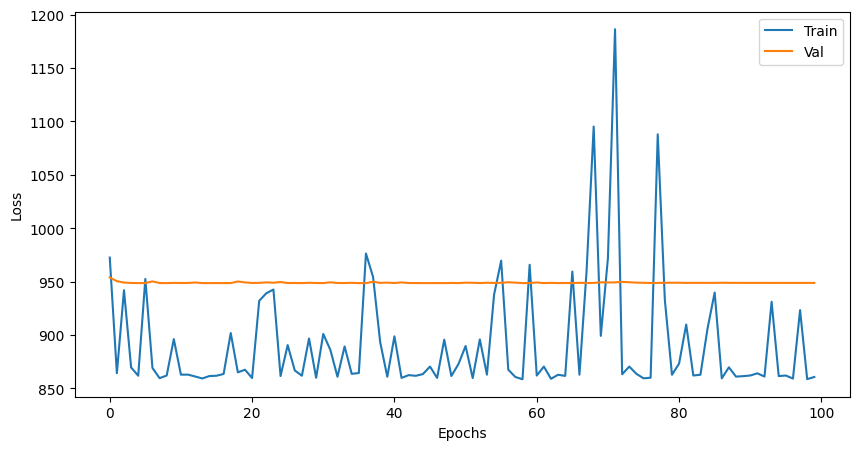

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [103]:
# Load the trained weights
model.load_state_dict(torch.load('best_model.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

pred_value = []
actual_value = []

with torch.no_grad():
    for features, labels in test_loader:
        
        outputs = model(features).squeeze(-1)
        pred_value.append(outputs.cpu())
        actual_value.append(labels)

pred_value = torch.cat(pred_value)
actual_value = torch.cat(actual_value)

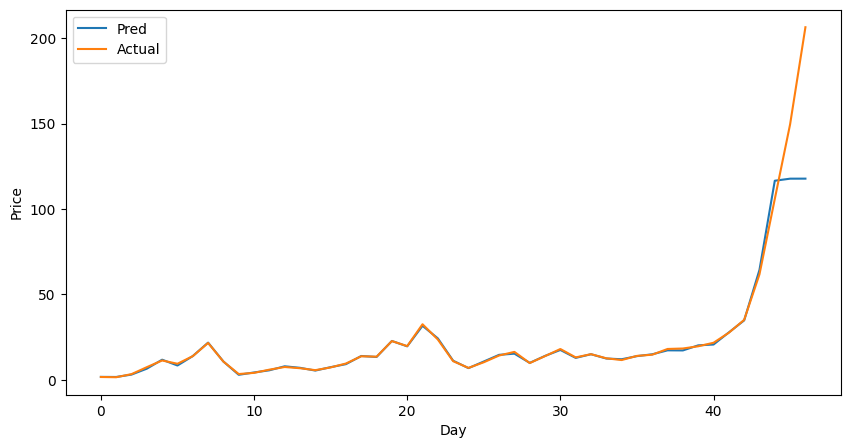

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(pred_value[:])
plt.plot(actual_value[:])
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend(['Pred', 'Actual'])

plt.show()

In [104]:
mse = criterion(pred_value, actual_value)
print(f'Test MSE: {mse.item():.4f}')

Test MSE: 1095.7299
